In [1]:
import tensorflow
import PIL
import keras
import cv2
import pathlib
import os
import keras 
from tensorflow.keras import models,layers
from keras.models import Sequential

In [2]:
data_dir='.\\sleeeping\\photos'

In [3]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('sleeeping/photos')

In [4]:
os.listdir(data_dir)

['no slept', 'slept']

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('sleeeping/photos/no slept/-inspiring-creative-motivation-quote-vector-typography-print-design-86725338.jpg'),
 WindowsPath('sleeeping/photos/no slept/-pillow-because-disturbed-loud-noise-unable-sleep-restless-people_644694-270.jpg'),
 WindowsPath('sleeeping/photos/no slept/1000_F_556875263_yHOF5oLW54jdxAi6K00No6tiDdanjs3X.jpg'),
 WindowsPath('sleeeping/photos/no slept/15184519882_5b26a5b202_z.jpg'),
 WindowsPath('sleeeping/photos/no slept/1589473308.jpg'),
 WindowsPath('sleeeping/photos/no slept/1e875e9829818b5fe08330909cac6607.jpg'),
 WindowsPath('sleeeping/photos/no slept/20151957-82eaf99a-3f78-44ee-89b6-23ae6d4fa0c1.jpg'),
 WindowsPath('sleeeping/photos/no slept/210607-awake-netflix-lucius-hoyos-gina-rodriguez-ariana-greenblatt-ac-1044p.jpg'),
 WindowsPath('sleeeping/photos/no slept/220px-Awake_282021_film29_Official_Poster.jpg'),
 WindowsPath('sleeeping/photos/no slept/360_F_216987495_vGUXXs1gh0vCIsmsSGQntQFWhaWc67Rr.jpg'),
 WindowsPath('sleeeping/photos/no slept/51bP

In [6]:
img_add={
    'slept':list(data_dir.glob('slept/*.jpg')),
    'noslept':list(data_dir.glob('no slept/*.jpg'))
}

In [7]:
img_name={
    'slept':0,
    'noslept':1
}

len(add)

In [8]:
img_add['slept'][0]

WindowsPath('sleeeping/photos/slept/0075.190607.EightSleep.15742.emp_.jpg')

In [9]:
len(add)

NameError: name 'add' is not defined

In [ ]:
from PIL import Image
img=Image.open(str(img_add['slept'][0])).resize((180,180))
img

In [10]:
x=[]
y=[]
for address,image in img_add.items():
    for img in image:
        k=cv2.imread(str(img))
        r=cv2.resize(k,(180,180))
        x.append(r)
        y.append(img_name[address])


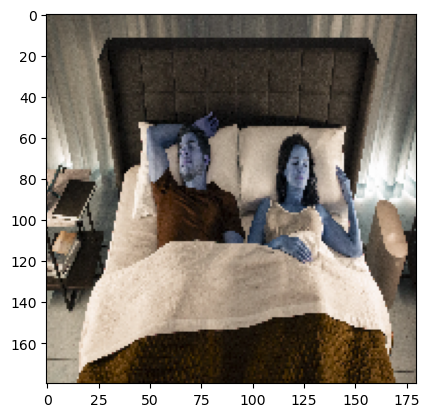

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [17]:
print(y[0])

0


In [18]:
import numpy as np
x_array=np.array(x)
y_array=np.array(y)

In [19]:
X=x_array/255
Y=y_array

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
x_train[0]

array([[[0.85490196, 0.85490196, 0.85490196],
        [0.85882353, 0.85882353, 0.85882353],
        [0.85882353, 0.85882353, 0.85882353],
        ...,
        [0.57647059, 0.57647059, 0.57647059],
        [0.57647059, 0.57647059, 0.57647059],
        [0.56862745, 0.56862745, 0.56862745]],

       [[0.85882353, 0.85882353, 0.85882353],
        [0.85882353, 0.85882353, 0.85882353],
        [0.8627451 , 0.8627451 , 0.8627451 ],
        ...,
        [0.57254902, 0.57254902, 0.57254902],
        [0.57254902, 0.57254902, 0.57254902],
        [0.56470588, 0.56470588, 0.56470588]],

       [[0.8627451 , 0.8627451 , 0.8627451 ],
        [0.8627451 , 0.8627451 , 0.8627451 ],
        [0.86666667, 0.86666667, 0.86666667],
        ...,
        [0.56862745, 0.56862745, 0.56862745],
        [0.56470588, 0.56470588, 0.56470588],
        [0.55686275, 0.55686275, 0.55686275]],

       ...,

       [[0.81568627, 0.81568627, 0.81568627],
        [0.81960784, 0.81960784, 0.81960784],
        [0.82352941, 0

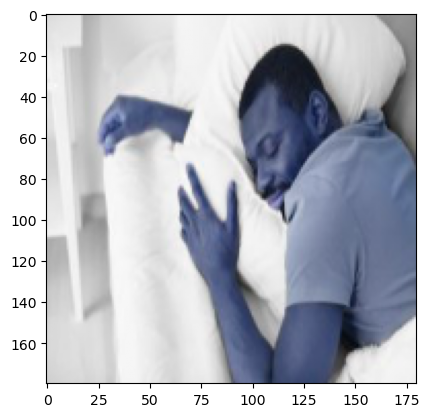

In [22]:
plt.imshow(x_train[0])

In [23]:
y_test[0]

0

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

NameError: name 'img_height' is not defined

In [25]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)    

NameError: name 'data_augmentation' is not defined

In [26]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)      

Epoch 1/10
9/9 [==============================] - 46s 792ms/step - loss: 0.9695 - accuracy: 0.6062
Epoch 2/10
9/9 [==============================] - 4s 443ms/step - loss: 0.5562 - accuracy: 0.6834
Epoch 3/10
9/9 [==============================] - 5s 430ms/step - loss: 0.5736 - accuracy: 0.6795
Epoch 4/10
9/9 [==============================] - 4s 395ms/step - loss: 0.4827 - accuracy: 0.7413
Epoch 5/10
9/9 [==============================] - 4s 381ms/step - loss: 0.4088 - accuracy: 0.8378
Epoch 6/10
9/9 [==============================] - 3s 382ms/step - loss: 0.3355 - accuracy: 0.8610
Epoch 7/10
9/9 [==============================] - 4s 384ms/step - loss: 0.2557 - accuracy: 0.8880
Epoch 8/10
9/9 [==============================] - 3s 376ms/step - loss: 0.1466 - accuracy: 0.9691
Epoch 9/10
9/9 [==============================] - 3s 375ms/step - loss: 0.0919 - accuracy: 0.9768
Epoch 10/10
9/9 [==============================] - 3s 369ms/step - loss: 0.0523 - accuracy: 0.9846


In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
y_pred=model.predict(x_train)

In [ ]:
x_train[0].shape

In [ ]:
np.argmax(y_pred[0])

In [ ]:
np.argmax(y_pred[99])

In [ ]:
classes=['sleeping','notsleeping']
def pred(x,y,ind):
    t=np.argmax(y[ind])
    plt.imshow(x[ind])
    plt.xlabel(classes[t])
    

In [ ]:
pred(x_train,y_pred,111)

sleeeping\harsha.jpg
[[[228 227 229]
  [228 227 229]
  [229 228 230]
  ...
  [217 215 221]
  [217 215 221]
  [217 215 221]]

 [[228 227 229]
  [228 227 229]
  [229 228 230]
  ...
  [217 215 221]
  [217 215 221]
  [217 215 221]]

 [[228 227 229]
  [228 227 229]
  [229 228 230]
  ...
  [217 215 221]
  [217 215 221]
  [217 215 221]]

 ...

 [[ 23  18  19]
  [ 23  18  19]
  [ 23  18  19]
  ...
  [113 102 104]
  [113 102 104]
  [113 102 104]]

 [[ 23  18  19]
  [ 23  18  19]
  [ 23  18  19]
  ...
  [113 102 104]
  [113 102 104]
  [113 102 104]]

 [[ 23  18  19]
  [ 23  18  19]
  [ 23  18  19]
  ...
  [113 102 104]
  [113 102 104]
  [112 101 103]]]


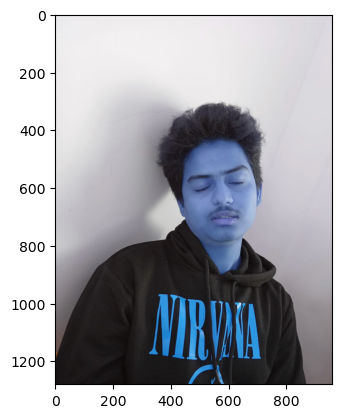

In [43]:
xx=pathlib.Path('.\\sleeeping\\harsha.jpg')
print(xx)
c=cv2.imread(str(xx))
print(c)
#k=cv2.resize(c,(180,180))
#print(k)
import matplotlib.pyplot as plt
plt.imshow(c)


In [56]:
def random(img):
    xx=pathlib.Path(img)
    c=cv2.imread(str(xx))
    print(c)
    plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
    k=cv2.resize(c,(180,180))
    z=k[np.newaxis, ...]
    y=model.predict(z)
    o=np.argmax(y)
    
    return o
    


[[[152 150 150]
  [149 151 151]
  [149 154 155]
  ...
  [255 255 251]
  [251 253 253]
  [249 250 254]]

 [[154 154 154]
  [152 154 154]
  [148 156 156]
  ...
  [251 254 245]
  [253 254 252]
  [251 253 254]]

 [[155 155 155]
  [151 156 155]
  [148 156 156]
  ...
  [241 242 232]
  [250 252 246]
  [255 255 254]]

 ...

 [[119 124 122]
  [119 124 122]
  [119 124 122]
  ...
  [  6   7   5]
  [  6   7   5]
  [  6   7   5]]

 [[119 124 122]
  [119 124 122]
  [119 124 122]
  ...
  [  6   7   5]
  [  6   7   5]
  [  6   7   5]]

 [[119 124 122]
  [119 124 122]
  [119 124 122]
  ...
  [  6   7   5]
  [  6   7   5]
  [  6   7   5]]]
1/1 [==============================] - 1s 617ms/step
0
sleeping


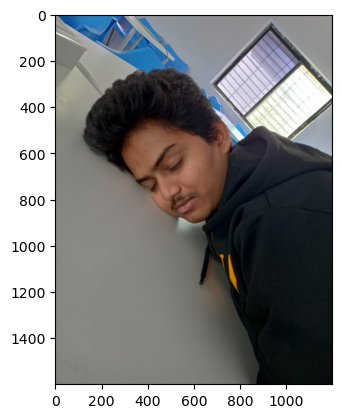

In [57]:
pred=random('.\\sleeeping\\harsha2.jpg')
print(pred)
if pred==0:
    print("sleeping")
else:
    print("not sleeping")

#import matplotlib.pyplot as plt

[[[183 184 182]
  [184 185 183]
  [185 186 184]
  ...
  [211 208 223]
  [211 208 223]
  [211 208 223]]

 [[183 184 182]
  [184 185 183]
  [185 186 184]
  ...
  [211 208 223]
  [211 208 223]
  [211 208 223]]

 [[183 184 182]
  [183 184 182]
  [185 186 184]
  ...
  [210 207 222]
  [210 207 222]
  [210 207 222]]

 ...

 [[ 44  42  24]
  [ 51  49  31]
  [ 66  64  46]
  ...
  [122 139 160]
  [125 142 163]
  [128 145 166]]

 [[ 69  67  49]
  [ 67  65  47]
  [ 78  76  58]
  ...
  [123 140 161]
  [126 143 164]
  [129 146 167]]

 [[113 111  93]
  [ 92  90  72]
  [ 91  89  71]
  ...
  [123 140 161]
  [127 144 165]
  [129 146 167]]]
1/1 [==============================] - 5s 5s/step
1
not sleeping


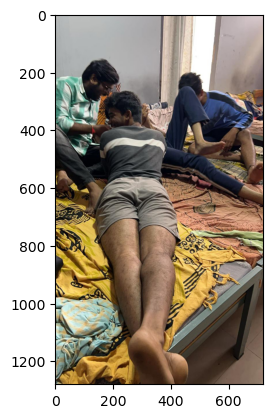

In [61]:
pred=random('.\\sleeeping\\del123.jpg')
print(pred)
if pred==0:
    print("sleeping")
else:
    print("not sleeping")

#import matplotlib.pyplot as plt

In [ ]:
random('del3.jpeg')

In [ ]:
random('del4.jpeg')

In [ ]:
random('del5.jpeg')

In [ ]:
random('del6.jpeg')

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

models = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

models.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
models.fit(x_train, y_train, epochs=10)  

In [ ]:
def randoms(img):
    xx=pathlib.Path(img)
    #path=Image.open(xx)
    #print(path)
    c=cv2.imread(str(xx))
    k=cv2.resize(c,(180,180))
    a=k/255
    plt.imshow(cv2.cvtColor(k,cv2.COLOR_BGR2RGB))
    z=a[np.newaxis, ...]
    y=models.predict(z)
    print(np.argmax(y))
    


In [ ]:
randoms('del6.jpeg')